#
<span style="font-family: Times New Roman; font-size: 20px;">
<h1 align='center'> 
Dataset Generation
</h1>

This notebook is used to generate the dataset for the problem statement. We have chosen the two classes as ***Cheetah*** and ***Jaguar*** based on the initials of two of our team-members **C**hirag Patel and **J**agodara Ruchit. The dataset is generated using the library bing_image_downloader. The dataset is generated by downloading images of cats and rats from the internet. The dataset is then split into training and testing datasets.

In [8]:
import os
from bing_image_downloader import downloader

In [13]:
# Removing Images folder if exists
import shutil
if os.path.exists('./images'):
    shutil.rmtree('./images')

In [14]:
downloader.download("Jaguar (animal)", limit=100, output_dir='images', filter='animal', force_replace=False, timeout=2, verbose=True)
downloader.download("Cheetah (animal)", limit=100, output_dir='images', filter='animal', force_replace=False, timeout=2, verbose=True)

[%] Downloading Images to c:\Users\Hitesh\Desktop\ML2024_SkyNet_Assignment4\images\Jaguar (animal)


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/0a/0d/5b/0a0d5b46f089152a0d43195cab467d0a.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://images7.alphacoders.com/382/382539.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://photos.demandstudios.com/getty/article/64/218/478819163.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/3e/97/96/3e97962582fd09cb2017bf218add4e0c.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://3.bp.blogspot.com/-SCThRd3GNOg/TcXtIGzZ2TI/AAAAAAAAAB8/11Qk9imzd-Y/s1600/Jaguar.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://3.bp.blogspot.com/-_kl6kYQp-Es/TcDN6la6s9I/AAAAAAAAFSM/RuT50uC0Zr4/s1600/wallpaper_jaguar.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://images5.alphacoders.com/43

##
<span style="font-family: Times New Roman; font-size: 20px;">

<h2>
Pre-Procesing the Generated Dataset
</h2>

In [17]:
# Renaming the files (eg. cat_1.jpg, cat_2.jpg, etc.)
for i, filename in enumerate(os.listdir('images/jaguar (animal)')):
    os.rename(f'images/jaguar (animal)/{filename}', f'images/jaguar (animal)/jaguar_{i+1}.jpg')
    
for i, filename in enumerate(os.listdir('images/cheetah (animal)')):
    os.rename(f'images/cheetah (animal)/{filename}', f'images/cheetah (animal)/cheetah_{i+1}.jpg')

In [18]:
# Making them of the same shape
from PIL import Image

os.makedirs('reshaped_images/jaguar (animal)', exist_ok=True)
os.makedirs('reshaped_images/cheetah (animal)', exist_ok=True)
for i, filename in enumerate(os.listdir('images/jaguar (animal)')):
    img = Image.open(f'images/jaguar (animal)/jaguar_{i+1}.jpg')
    img = img.resize((256, 256))
    img = img.convert("RGB")  # Convert image mode to RGB
    img.save(f'reshaped_images/jaguar (animal)/jaguar_{i+1}.jpg')
    
for i, filename in enumerate(os.listdir('images/cheetah (animal)')):
    img = Image.open(f'images/cheetah (animal)/cheetah_{i+1}.jpg')
    img = img.resize((256, 256))
    img = img.convert("RGB")  # Convert image mode to RGB
    img.save(f'reshaped_images/cheetah (animal)/cheetah_{i+1}.jpg')


In [23]:
# Splitting the data into training 80% and testing 20%
import random
import shutil

if os.path.exists('data'):
    shutil.rmtree('data')
    
os.makedirs('data/train/jaguar', exist_ok=True)
os.makedirs('data/test/jaguar', exist_ok=True)
os.makedirs('data/train/cheetah', exist_ok=True)
os.makedirs('data/test/cheetah', exist_ok=True)

jaguar_images = os.listdir('reshaped_images/jaguar (animal)')
cheetah_images = os.listdir('reshaped_images/cheetah (animal)')
random.shuffle(jaguar_images)
random.shuffle(cheetah_images)

for i, filename in enumerate(jaguar_images):
    if i < 80:
        shutil.copy(f'reshaped_images/jaguar (animal)/{filename}', f'data/train/jaguar/{filename}')
    else:
        shutil.copy(f'reshaped_images/jaguar (animal)/{filename}', f'data/test/jaguar/{filename}')
        
for i, filename in enumerate(cheetah_images):
    if i < 80:
        shutil.copy(f'reshaped_images/cheetah (animal)/{filename}', f'data/train/cheetah/{filename}')
    else:
        shutil.copy(f'reshaped_images/cheetah (animal)/{filename}', f'data/test/cheetah/{filename}')
        
print('Data is ready!')

Data is ready!


In [24]:
# Deleting the unnecessary folders
import shutil

shutil.rmtree('images')
shutil.rmtree('reshaped_images')
print("Deleted unnecessary folders!")

Deleted unnecessary folders!


#
<span style="font-family: Times New Roman; font-size: 20px;">
<h2> 
Showing the Images of the Dataset
</h2>

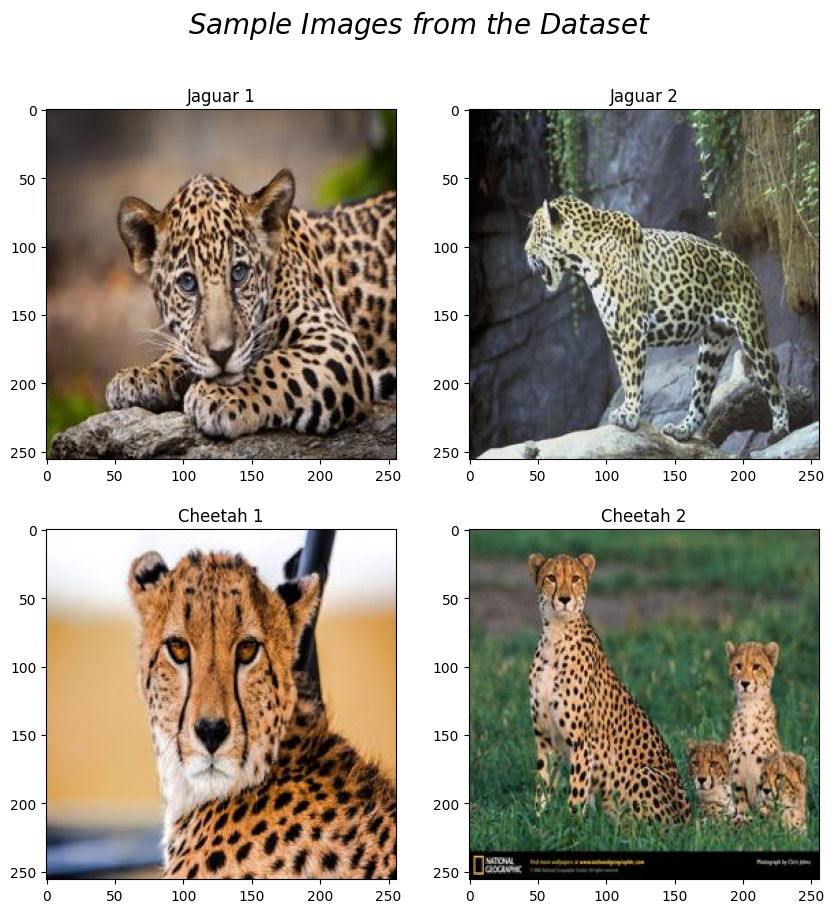

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('$Sample$ $Images$ $from$ $the$ $Dataset$', fontsize=20)

# Randomly selecting 4 images from the dataset
jaguar_images = os.listdir('data/train/jaguar')
cheetah_images = os.listdir('data/train/cheetah')
random.shuffle(jaguar_images)
random.shuffle(cheetah_images)

for i in range(2):
    img = mpimg.imread(f'data/train/jaguar/{jaguar_images[i]}')
    axs[0, i].imshow(img)
    axs[0, i].set_title(f'Jaguar {i+1}')
    
    img = mpimg.imread(f'data/train/cheetah/{cheetah_images[i]}')
    axs[1, i].imshow(img)
    axs[1, i].set_title(f'Cheetah {i+1}')
    
plt.show()

In [ ]:
def data_loader(directory):
    import os
    import numpy as np
    import torch
    from keras.preprocessing import image
    for i, filename in enumerate(os.listdir(directory)):
        img = image.load_img(directory + filename, target_size=(250, 250))
        img = image.img_to_array(img)
        img = img.reshape((1,) + img.shape)
        if i == 0:
            images = img
        else:
            images = np.vstack((images, img))
    return torch.tensor(images)

In [ ]:
jaguar_images = data_loader('data/train/jaguar/')
jaguar_images